In [1]:
!date

Wed Jan 18 01:58:29 PST 2023


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/squint_2


In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

#import scvi
import sys

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.metrics import adjusted_mutual_info_score

from sklearn.metrics import accuracy_score

In [4]:
import random
import torch
import os

seed = 1

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
#    scvi.settings.seed = seed # scvi-tools seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(seed)

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
output_dir='/c4/home/derek/data1/derek/scSLR/notebooks/fig2/plots/'

In [6]:
input_dir_internal_1= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_internal/Solo.out/GeneFull/raw/'

adata_internal_1 = sc.read_mtx(input_dir_internal_1 + 'matrix.mtx').T
adata_internal_1.obs_names = pd.read_csv(input_dir_internal_1+'barcodes.tsv',header=None)[0]
adata_internal_1.var_names = pd.read_csv(input_dir_internal_1+'features.tsv',header=None,sep='\t')[1]

In [7]:
input_dir_internal_2= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/StarOut_internal/Solo.out/GeneFull/raw/'

adata_internal_2 = sc.read_mtx(input_dir_internal_2 + 'matrix.mtx').T
adata_internal_2.obs_names = pd.read_csv(input_dir_internal_2+'barcodes.tsv',header=None)[0]
adata_internal_2.var_names = pd.read_csv(input_dir_internal_2+'features.tsv',header=None,sep='\t')[1]

In [8]:
input_dir_5prime_1= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_5prime/Solo.out/GeneFull/raw/'

adata_5prime_1 = sc.read_mtx(input_dir_5prime_1 + 'matrix.mtx').T
adata_5prime_1.obs_names = pd.read_csv(input_dir_5prime_1+'barcodes.tsv',header=None)[0]
adata_5prime_1.var_names = pd.read_csv(input_dir_5prime_1+'features.tsv',header=None,sep='\t')[1]

In [9]:
input_dir_5prime_2= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/StarOut_5prime/Solo.out/GeneFull/raw/'

adata_5prime_2 = sc.read_mtx(input_dir_5prime_2 + 'matrix.mtx').T
adata_5prime_2.obs_names = pd.read_csv(input_dir_5prime_2+'barcodes.tsv',header=None)[0]
adata_5prime_2.var_names = pd.read_csv(input_dir_5prime_2+'features.tsv',header=None,sep='\t')[1]

In [10]:
adata_internal_1.var_names_make_unique()
adata_internal_2.var_names_make_unique()

adata_5prime_1.var_names_make_unique()
adata_5prime_2.var_names_make_unique()

In [11]:
annotations_1 = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/PBMC_sample_1_idents.csv',sep='\t',header=None,index_col=0,names=['celltype'])
annotations_2 = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/PBMC_sample_2_idents.csv',sep='\t',header=None,index_col=0,names=['celltype'])

In [12]:
adata_internal_1 = adata_internal_1[adata_internal_1.obs_names.isin(annotations_1.index)]
adata_internal_2 = adata_internal_2[adata_internal_2.obs_names.isin(annotations_2.index)]

adata_internal_1.obs['celltype'] = annotations_1['celltype']
adata_internal_2.obs['celltype'] = annotations_2['celltype']

adata_5prime_1 = adata_5prime_1[adata_5prime_1.obs_names.isin(annotations_1.index)]
adata_5prime_2 = adata_5prime_2[adata_5prime_2.obs_names.isin(annotations_2.index)]

adata_5prime_1.obs['celltype'] = annotations_1['celltype']
adata_5prime_2.obs['celltype'] = annotations_2['celltype']

/scratch/derek/ipykernel_3094/3105132940.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_internal_1.obs['celltype'] = annotations_1['celltype']
/scratch/derek/ipykernel_3094/3105132940.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_internal_2.obs['celltype'] = annotations_2['celltype']
/scratch/derek/ipykernel_3094/3105132940.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5prime_1.obs['celltype'] = annotations_1['celltype']
/scratch/derek/ipykernel_3094/3105132940.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5prime_2.obs['celltype'] = annotations_2['celltype']


In [13]:
adata_internal = adata_internal_1.concatenate(adata_internal_2)
adata_5prime = adata_5prime_1.concatenate(adata_5prime_2)

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [14]:
adata = adata_internal.concatenate([adata_5prime],
                                 batch_categories=['internal','5prime']
                                )

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [15]:
#sc.pp.filter_cells(adata,min_counts=200)
sc.pp.filter_cells(adata,min_genes=1)

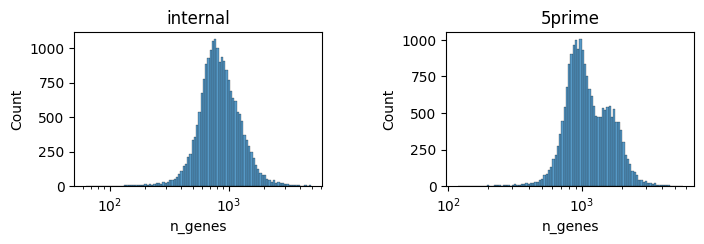

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2))

plt.subplots_adjust(wspace=0.5)

for i, ax in zip(adata.obs.batch.cat.categories.tolist(), axes.ravel()):
    sns.histplot(adata[adata.obs["batch"] == i].obs["n_genes"],ax=ax,
                 bins=100, kde=False, log_scale =True).set(title=i)

    
 


In [17]:
sc.pp.calculate_qc_metrics(adata,inplace=True)

In [18]:
sc.pp.filter_cells(adata,min_genes=500)

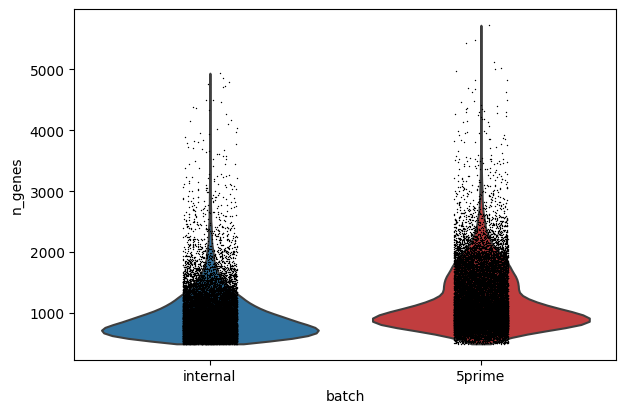

In [19]:

color_palette = sns.color_palette("tab10")

sc.pl.violin(adata,groupby='batch',keys='n_genes',
             palette=[color_palette[0],color_palette[3],color_palette[1]]
            
            )



In [20]:
adata.obs.batch.value_counts()

5prime      20354
internal    19090
Name: batch, dtype: int64

In [21]:
#adata_bac = adata.copy()
#adata = adata_bac.copy()

In [22]:
## filter cells to the same IDs per batch



In [23]:
intersection = (adata[adata.obs['batch'] == '5prime'].obs.index.str[:-7] & adata[adata.obs['batch'] == 'internal'].obs.index.str[:-9])

/scratch/derek/ipykernel_3094/2449252722.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  intersection = (adata[adata.obs['batch'] == '5prime'].obs.index.str[:-7] & adata[adata.obs['batch'] == 'internal'].obs.index.str[:-9])


In [24]:
intersection

Index(['AAACCTGAGATATGCA-0', 'AAACCTGAGCTGATAA-0', 'AAACCTGAGGTCGGAT-0',
       'AAACCTGAGTACGTTC-0', 'AAACCTGAGTCAAGCG-0', 'AAACCTGAGTCGCCGT-0',
       'AAACCTGAGTTGCAGG-0', 'AAACCTGAGTTGTAGA-0', 'AAACCTGCAACAACCT-0',
       'AAACCTGCAACACCCG-0',
       ...
       'TTTGTCACAGTTCATG-1', 'TTTGTCAGTAGAAGGA-1', 'TTTGTCAGTCTTGTCC-1',
       'TTTGTCAGTCTTTCAT-1', 'TTTGTCAGTGCAGGTA-1', 'TTTGTCAGTGTTGAGG-1',
       'TTTGTCAGTTGGACCC-1', 'TTTGTCAGTTGTACAC-1', 'TTTGTCATCCGGGTGT-1',
       'TTTGTCATCTACTATC-1'],
      dtype='object', length=19087)

In [25]:
adata = adata[adata.obs_names.isin((intersection.astype('str')+'-internal' | intersection.astype('str')+'-5prime'))]

/scratch/derek/ipykernel_3094/2775268895.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  adata = adata[adata.obs_names.isin((intersection.astype('str')+'-internal' | intersection.astype('str')+'-5prime'))]


In [26]:
adata

View of AnnData object with n_obs × n_vars = 38174 × 36385
    obs: 'celltype', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [27]:
adata.layers["counts"] = adata.X.copy()


sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.raw = adata.copy()

In [28]:
import sys

In [29]:
#!python -m pip install --prefix {sys.prefix} scikit-misc

In [30]:
HVG = sc.pp.highly_variable_genes(
    adata,
    flavor="seurat",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    inplace=False
)      

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


In [31]:
adata_5prime = adata[adata.obs['batch'] == '5prime'].raw.to_adata().copy()
adata_5prime.obs_names = adata_5prime.obs_names.str[:-7]

In [32]:
# sc.pp.filter_cells(adata_3prime,min_genes=1000)
# sc.pp.filter_genes(adata_3prime,min_cells=1)

In [33]:
adata_5prime = adata_5prime[:,HVG['highly_variable']]

In [34]:
adata_5prime 

View of AnnData object with n_obs × n_vars = 19087 × 2000
    obs: 'celltype', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [35]:
adata_5prime = adata_5prime.copy()

In [36]:
#scvi.model.SCVI.setup_anndata(adata_3prime)

In [37]:
#vae = scvi.model.SCVI(adata_3prime, n_layers=1, n_latent=10, gene_likelihood="zinb")

In [38]:
#vae.train()

In [39]:
#adata_3prime.obsm["X_scVI"] = vae.get_latent_representation()

In [40]:
# sc.pp.normalize_total(adata_3prime, target_sum=1e4)
# sc.pp.log1p(adata_3prime)
sc.pp.regress_out(adata_5prime, ['total_counts'])
sc.pp.scale(adata_5prime, max_value=10)

sc.tl.pca(adata_5prime, svd_solver='arpack')

In [41]:
#sc.pp.neighbors(adata_3prime, use_rep="X_scVI")
sc.pp.neighbors(adata_5prime, use_rep="X_pca",n_pcs=30)

In [42]:
sc.tl.umap(adata_5prime)

In [43]:
sc.tl.leiden(adata_5prime,resolution=.26)

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


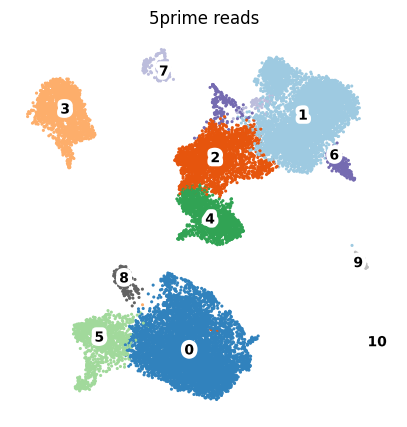

In [44]:
plt.rcParams['figure.figsize']=5,5


sc.pl.umap(adata_5prime,
           color=[
               'leiden',
           ],
           title='5prime reads',
            legend_loc='on data',
           legend_fontoutline=6,
           palette= 'tab20c',#     #sc.pl.palettes.default_20,
           frameon=False,
           s=20
          )

In [45]:
adata_internal= adata[adata.obs['batch'] == 'internal'].raw.to_adata().copy()
adata_internal.obs_names = adata_internal.obs_names.str[:-9]

In [46]:
adata_internal = adata_internal[:,HVG['highly_variable']]

In [47]:
adata_internal = adata_internal.copy()

In [48]:
sc.pp.calculate_qc_metrics(adata_5prime,inplace=True)
sc.pp.calculate_qc_metrics(adata_internal,inplace=True)

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
#scvi.model.SCVI.setup_anndata(adata_internal)

In [50]:
#vae_int = scvi.model.SCVI(adata_internal, n_layers=1, n_latent=10, gene_likelihood="nb")

In [51]:
#vae_int.train()

In [52]:
#adata_internal.obsm["X_scVI"] = vae_int.get_latent_representation()

In [53]:
# sc.pp.normalize_total(adata_internal, target_sum=1e4)
# sc.pp.log1p(adata_internal)
sc.pp.regress_out(adata_internal, ['total_counts'])
sc.pp.scale(adata_internal, max_value=10)
sc.tl.pca(adata_internal, svd_solver='arpack')

In [54]:
sc.pp.neighbors(adata_internal, use_rep="X_pca" ,n_pcs=30)
#sc.pp.neighbors(adata_internal, use_rep="X_scVI")

In [55]:
sc.tl.umap(adata_internal)

In [56]:
#adata_internal.obs['3prime_leiden'] = adata_3prime.obs['leiden']

In [57]:
sc.tl.leiden(adata_internal,resolution=.9)

In [58]:
#sc.tl.tsne(adata_internal,n_pcs=20)

In [59]:
#adata_internal.obs['celltype'] = annotations_2['celltype']

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


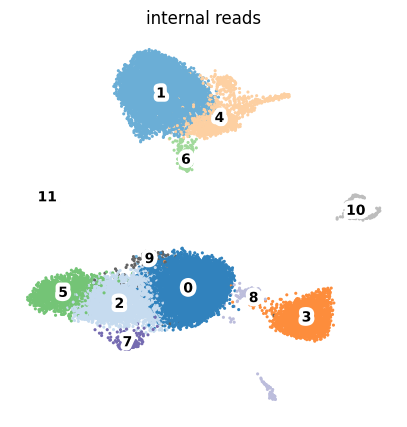

In [60]:
plt.rcParams['figure.figsize']=5,5
sc.pl.umap(adata_internal,
           color=[
                'leiden',
               ],
           title='internal reads',
           legend_loc='on data',
           legend_fontoutline=6,
           palette='tab20c',
           size=20,
           frameon=False,
          )

In [61]:
adata_5prime.obs['leiden_internal'] = adata_internal.obs['leiden']

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


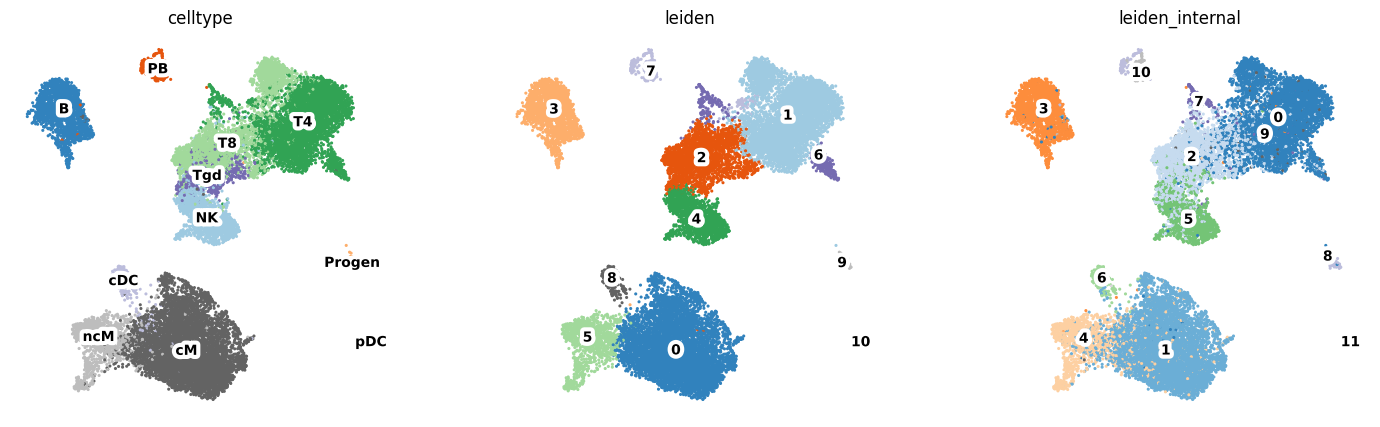

In [62]:
plt.rcParams['figure.figsize']=5,5
sc.pl.umap(adata_5prime,
           color=['celltype',
                'leiden',
               'leiden_internal'],
           legend_loc='on data',
           legend_fontoutline=6,
           palette='tab20c',
           size=20,
           frameon=False,
          )

In [93]:
adata_5prime.obsm['X_umap']

array([[ 9.124837 , -5.5399985],
       [ 4.902106 , -5.2653136],
       [13.490198 ,  9.194381 ],
       ...,
       [ 7.4376717,  7.5808015],
       [ 7.51051  ,  7.204154 ],
       [ 7.371976 , -4.392894 ]], dtype=float32)

In [101]:
adata_5prime.write_h5ad('/c4/home/derek/data1/derek/data_scSLR/PBMC/5prime_exp_h5ad')

In [63]:
df = adata_5prime.obs.groupby(["leiden", "leiden_internal"]).size().unstack(fill_value=0)


In [64]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]


Text(0, 0.5, 'Observed')

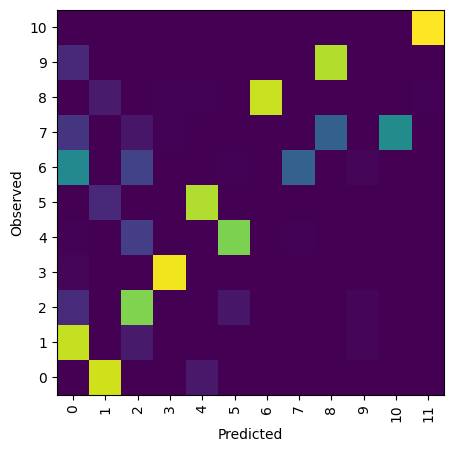

In [65]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")


In [66]:
df.columns.tolist()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [67]:
df = df.reindex(['1','0','2','3','5','4','8','6','9','7','10'])

In [68]:
df = df[['0','1','2','3','4','5','6','7','8','9','10','11']]

In [69]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

Text(0, 0.5, 'Observed')

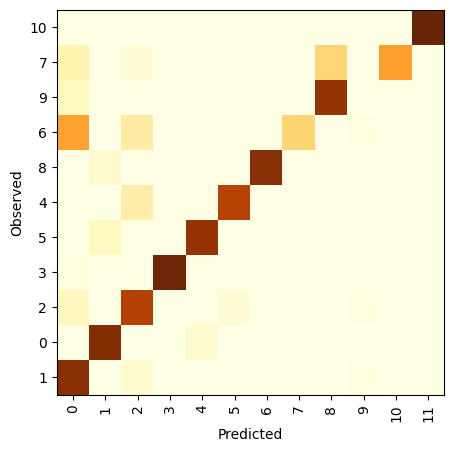

In [70]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat,cmap='YlOrBr')
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [71]:
ARI = adjusted_rand_score(adata_5prime.obs.leiden_internal, adata_5prime.obs.leiden)

In [72]:
AMI = adjusted_mutual_info_score(adata_5prime.obs.leiden_internal, adata_5prime.obs.leiden)

Text(33.22222222222222, 0.5, "5' read leiden clusters")

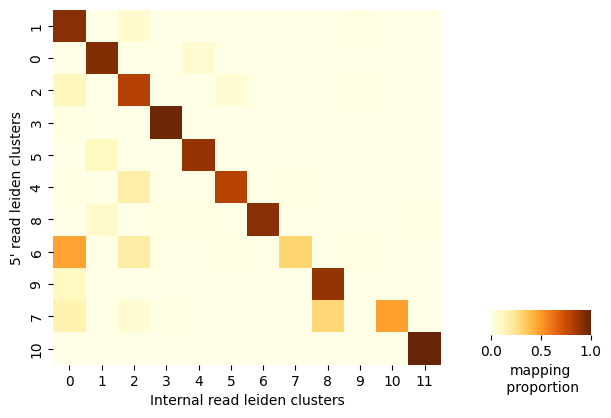

In [73]:
fig, ax = plt.subplots(1,1)

cbar_ax = fig.add_axes([1, .2, .2, .05])

sns.heatmap(conf_mat,
            ax=ax,
            cmap='YlOrBr',
            #cbar_pos=(1, .2, .2, .01),
            cbar_kws={'orientation':'horizontal','label':'mapping\n proportion',"shrink": .5},
            cbar_ax=cbar_ax,
            square=True
           )

ax.set_xlabel("Internal read leiden clusters")

ax.set_ylabel("5' read leiden clusters")

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


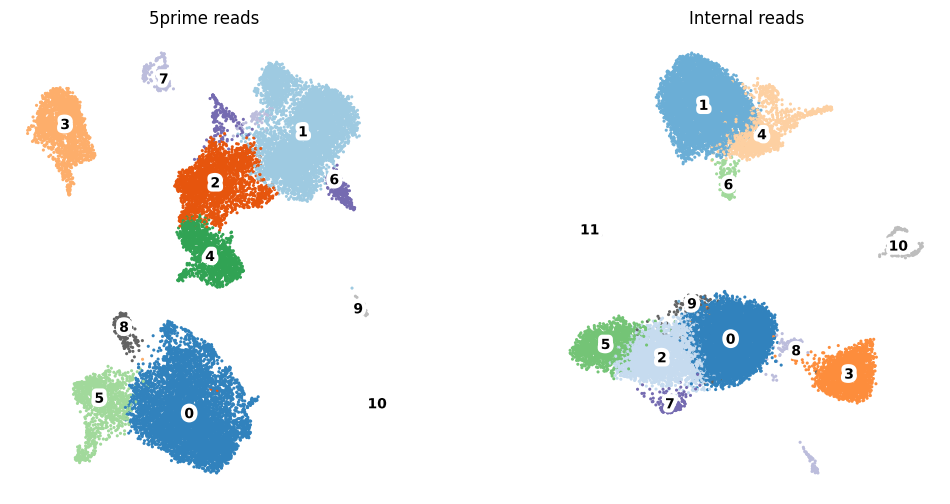

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sc.pl.umap(adata_5prime,
           color=[
                'leiden',
               ],
           title='5prime reads',
           legend_loc='on data',
           legend_fontoutline=6,
           palette='tab20c',
           size=20,
           frameon=False,
           ax=ax[0],
           show=False
          )

sc.pl.umap(adata_internal,
           color=[
                'leiden',
               ],
           title='Internal reads',
           legend_loc='on data',
           legend_fontoutline=6,
           palette='tab20c',
           size=20,
           frameon=False,
           ax=ax[1],
           show=False
          )

plt.subplots_adjust(wspace=0.4)


In [75]:
color_dict_internal = dict(zip(adata_internal.obs.leiden.cat.categories,adata_internal.uns['leiden_colors']))

In [76]:
color_dict_5prime = dict(zip(adata_5prime.obs.leiden.cat.categories,adata_5prime.uns['leiden_colors']))

In [77]:
adata_5prime.obs.leiden = adata_5prime.obs.leiden.cat.rename_categories(['1','0','2','3','5','4','8','6','9','7','10'])

adata_5prime.obs.leiden = adata_5prime.obs.leiden.cat.reorder_categories(['0','1','2','3','4','5','6','7','8','9','10'])

In [78]:
adata_internal.obs.leiden = adata_internal.obs.leiden.cat.rename_categories(['0','1','2','3','4','5','6','7','8','10','9','11'])

adata_internal.obs.leiden = adata_internal.obs.leiden.cat.reorder_categories(['0','1','2','3','4','5','6','7','8','9','10','11'])

In [79]:
adata_internal.obs.leiden.cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')

In [80]:
adata_5prime.obs.leiden.cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [81]:
# del adata_5prime.uns['leiden_colors']
# del adata_internal.uns['leiden_colors']

In [82]:
adata_5prime.uns['leiden_colors']

['#3182bd',
 '#9ecae1',
 '#e6550d',
 '#fdae6b',
 '#31a354',
 '#a1d99b',
 '#756bb1',
 '#bcbddc',
 '#636363',
 '#bdbdbd',
 '#d9d9d9']

In [83]:
adata_internal.uns['leiden_colors'][:-1]

['#3182bd',
 '#6baed6',
 '#c6dbef',
 '#fd8d3c',
 '#fdd0a2',
 '#74c476',
 '#a1d99b',
 '#756bb1',
 '#bcbddc',
 '#636363',
 '#bdbdbd']

In [84]:
adata_5prime.uns['leiden_colors'] = adata_internal.uns['leiden_colors'][:-1]

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


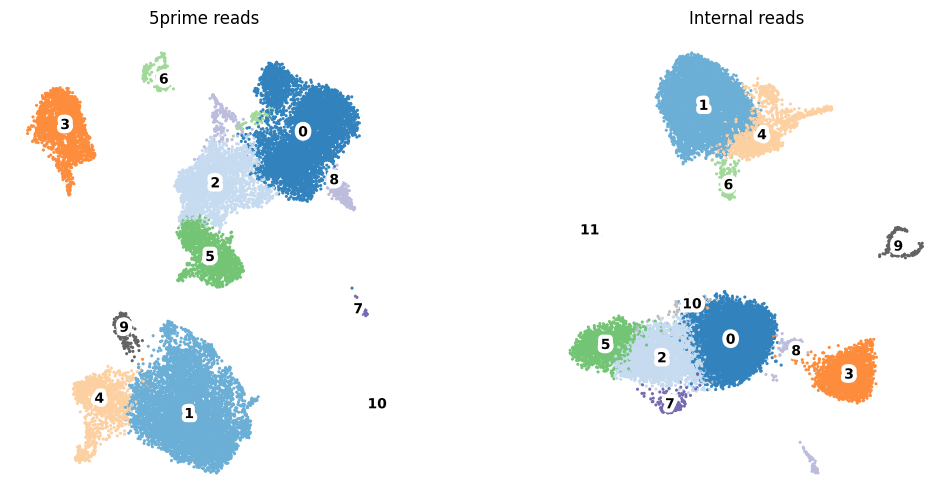

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sc.pl.umap(adata_5prime,
           color=[
                'leiden',
               ],
           title='5prime reads',
           legend_loc='on data',
           legend_fontoutline=6,
       #    palette='tab20c',
           size=20,
           frameon=False,
           ax=ax[0],
           show=False
          )

sc.pl.umap(adata_internal,
           color=[
                'leiden',
               ],
           title='Internal reads',
           legend_loc='on data',
           legend_fontoutline=6,
       #    palette='tab20c',
           size=20,
           frameon=False,
           ax=ax[1],
           show=False
          )

plt.subplots_adjust(wspace=0.4)


plt.savefig(output_dir+'expression_umaps.pdf')

In [86]:
adata_5prime.obs['leiden_internal'] = adata_internal.obs['leiden']

In [87]:
df = adata_5prime.obs.groupby(["leiden", "leiden_internal"]).size().unstack(fill_value=0)
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

In [88]:
conf_mat.columns.name = 'Internal leiden clusters'
conf_mat.index.name = '5prime leiden clusters'

In [89]:
conf_mat.T

5prime leiden clusters,0,1,2,3,4,5,6,7,8,9,10
Internal leiden clusters,,,,,,,,,,,
0,0.911128,0.002957,0.118292,0.014215,0.000890,0.005587,0.155172,0.114943,0.470588,0.000000,0.0
1,0.001111,0.929391,0.001958,0.003827,0.114871,0.000000,0.000000,0.000000,0.002353,0.070423,0.0
2,0.068136,0.000870,0.807286,0.001640,0.000890,0.181564,0.056034,0.000000,0.197647,0.000000,0.0
3,0.001111,0.000174,0.000392,0.978130,0.001781,0.000698,0.004310,0.000000,0.002353,0.004695,0.0
4,0.000555,0.064000,0.000392,0.000547,0.880677,0.000000,0.000000,0.000000,0.000000,0.004695,0.0
5,0.000555,0.000000,0.056796,0.000000,0.000000,0.803771,0.000000,0.000000,0.007059,0.000000,0.0
6,0.000000,0.002609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.915493,0.0
7,0.002222,0.000000,0.002350,0.000000,0.000000,0.004888,0.000000,0.000000,0.308235,0.000000,0.0
8,0.000741,0.000000,0.000000,0.000547,0.000000,0.000000,0.301724,0.885057,0.000000,0.000000,0.0


Text(0.3, 0.83, 'ARI: 0.7915')

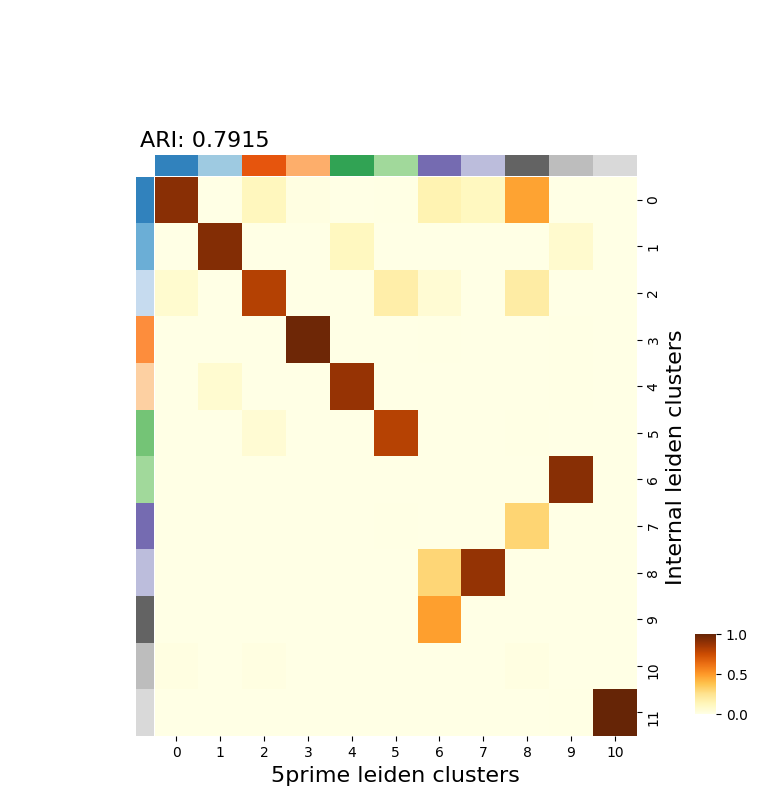

In [90]:


g = sns.clustermap(conf_mat.T,
            row_cluster=False,
            col_cluster=False,
            cmap='YlOrBr',
            row_colors=conf_mat.columns.map(color_dict_internal),
            col_colors=conf_mat.index.map(color_dict_5prime),
            #cbar_pos=(1, .2, .2, .01),
            # cbar_kws={'orientation':'horizontal','label':'mapping\n proportion',"shrink": .5},
            # cbar_ax=cbar_ax,
            cbar_pos=(1, .1, .03, .1),
            figsize=(7,8)
           )


#g.set_axis_labels(["Internal read leiden clusters", "5' read leiden clusters"])


g.ax_heatmap.set_xlabel(g.ax_heatmap.get_xlabel(), fontsize = 16)
g.ax_heatmap.set_ylabel(g.ax_heatmap.get_ylabel(), fontsize = 16)

g.fig.suptitle(f'ARI: {round(ARI, 4)}',x=0.3, y=0.83, fontsize =16) 


#g.savefig(output_dir+'expression_conf_matrix.pdf')